In [1]:
import numpy as np
import pandas as pd 
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
train_df = pd.read_csv('/kaggle/input/titanic/train.csv') 
test_df = pd.read_csv('/kaggle/input/titanic/test.csv')

In [3]:
print(train_df.shape)
print(test_df.shape)

(891, 12)
(418, 11)


In [4]:
### printing null and duplicate values
def null_dubs(data):
    null = data.isnull().sum()
    duplicates = data.duplicated().sum()
    return null,duplicates
null_Counts,duplicate_counts = null_dubs(train_df)
print(f'Null values are : {null_Counts}')
print(f'Duplicate values are : {duplicate_counts}')

Null values are : PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
Duplicate values are : 0


In [5]:
null_Counts,duplicate_counts = null_dubs(test_df)
print(f'Null values are : {null_Counts}')
print(f'Duplicate values are : {duplicate_counts}')

Null values are : PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64
Duplicate values are : 0


In [6]:
train_df.shape

(891, 12)

In [7]:
train_df = train_df.dropna(subset = ['Embarked'])

In [8]:
train_df.shape

(889, 12)

In [35]:
print("original train DataFrame shape:\n", train_df.shape)
print("original test DataFrame shape:\n", test_df.shape)
def data_clean(data):
    data = data.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)
    col = ['Age', 'Fare']
    for cols in col:
        data[cols] = data[cols].fillna(data[cols].median())
    return data

# Clean the train and test data
train_df = data_clean(train_df)
test_df = data_clean(test_df)

# Print the shapes of the cleaned dataframes
print("Cleaned train DataFrame shape:", train_df.shape)
print("Cleaned test DataFrame shape:",  test_df.shape)

original train DataFrame shape:
 (889, 12)
original test DataFrame shape:
 (418, 11)
Cleaned train DataFrame shape: (889, 8)
Cleaned test DataFrame shape: (418, 7)


# **DATA ANALYSIS**

In [36]:
train_df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

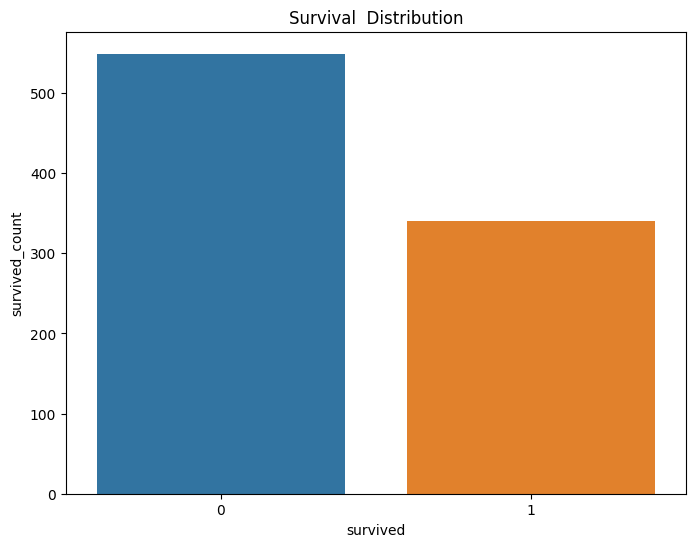

In [38]:
plt.figure(figsize = (8,6))
sns.countplot(x='Survived',data = train_df)
plt.title('Survival  Distribution')
plt.xlabel('survived')
plt.ylabel('survived_count')
plt.show()

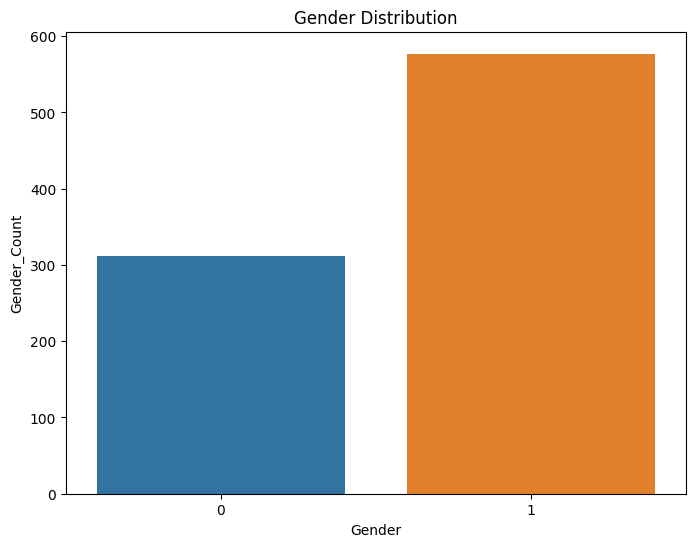

In [39]:
plt.figure(figsize = (8,6))
sns.countplot(x='Sex',data = train_df)
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Gender_Count')
plt.show()

In [40]:
survived_rate = train_df.groupby('Sex')['Survived'].sum().reset_index()

In [41]:
survived_rate.columns = ['Sex', 'Survived']

In [42]:
survived_rate

,Sex,Survived
0,0,231
1,1,109


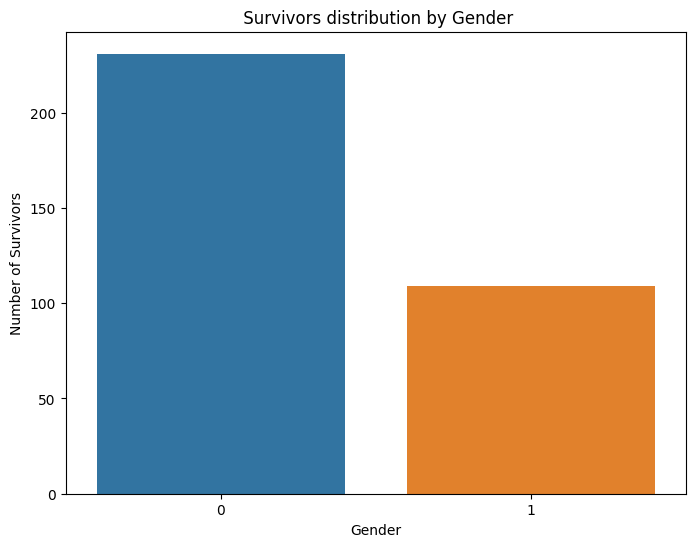

In [43]:
plt.figure(figsize = (8,6))
sns.barplot(x = 'Sex',y= 'Survived',data =survived_rate )
plt.title(' Survivors distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Survivors')
plt.show()

# From above analysis and visualization we can conclude that female passengers has more survival rate than the male passengers  

In [44]:
pclass_survived = train_df.groupby('Pclass')['Survived'].sum().reset_index()
pclass_survived

,Pclass,Survived
0,1,134
1,2,87
2,3,119


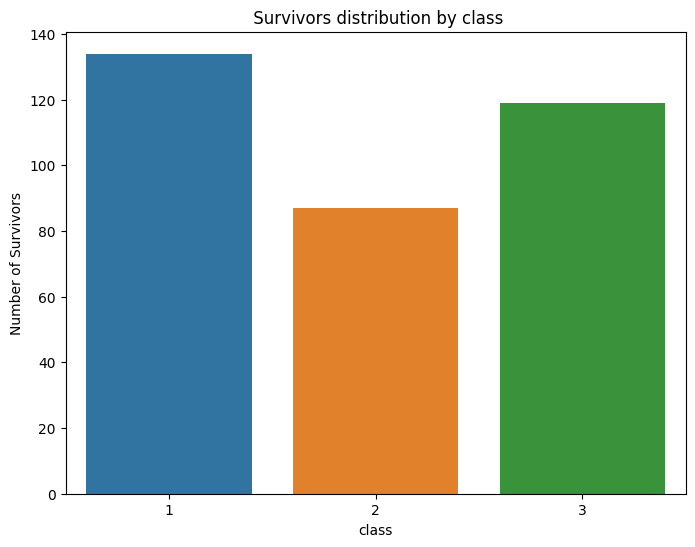

In [45]:
plt.figure(figsize = (8,6))
sns.barplot(x = 'Pclass',y= 'Survived',data =pclass_survived)
plt.title(' Survivors distribution by class')
plt.xlabel('class')
plt.ylabel('Number of Survivors')
plt.show()

# From the above barplot we can clearly say that the passengers who travelled in upper classes has more survival rate than the passengers who travelled in middle and Lower class.

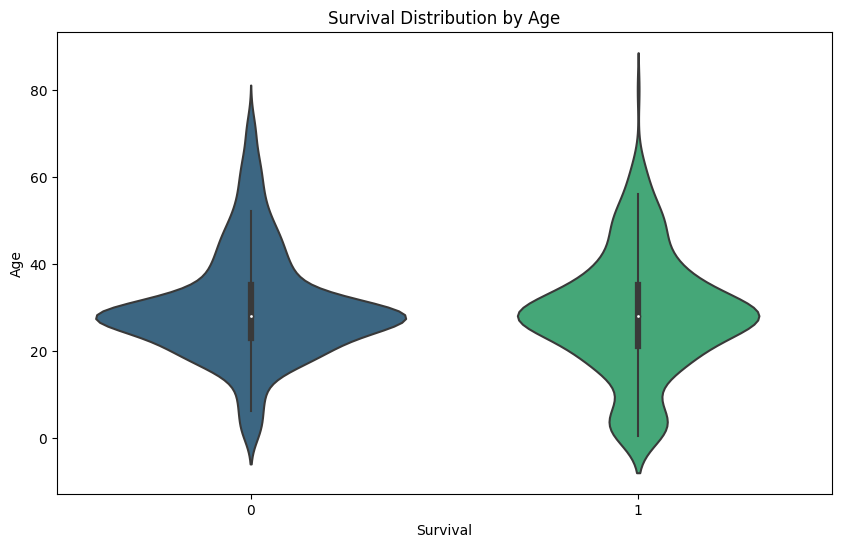

In [46]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='Survived', y='Age', data=train_df, palette='viridis')
plt.title('Survival Distribution by Age')
plt.xlabel('Survival')
plt.ylabel('Age')
plt.show()